In [116]:
# importing necessary modules!
import os
import time
from os.path import join
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

In [117]:
# import processing libraries along with keras which uses tensorflow as it's backend
import keras
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.models import Sequential, load_model
from keras.layers import Dense, Activation, Conv2D, Flatten, Dropout, MaxPooling2D
from keras.callbacks import ModelCheckpoint
from keras.applications.inception_v3 import InceptionV3, preprocess_input

In [118]:
keras.backend.clear_session()

In [119]:
train_hot_dog = "../is_that_a_hot_dog/assets/train/hot_dog"
train_not_hot_dog = "../is_that_a_hot_dog/assets/train/not_hot_dog"

test_hot_dog = "../is_that_a_hot_dog/assets/test/hot_dog"
test_not_hot = "../is_that_a_hot_dog/assets/test/not_hot_dog"

In [120]:
hot_dog_paths = [join(train_hot_dog,filename) for filename in ['1000288.jpg','127117.jpg']]

not_hot_dog_paths = [join(train_not_hot_dog, filename) for filename in ['100135.jpg','99934.jpg']]

img_paths = hot_dog_paths + not_hot_dog_paths

ValueError: num must be 1 <= num <= 60, not 61

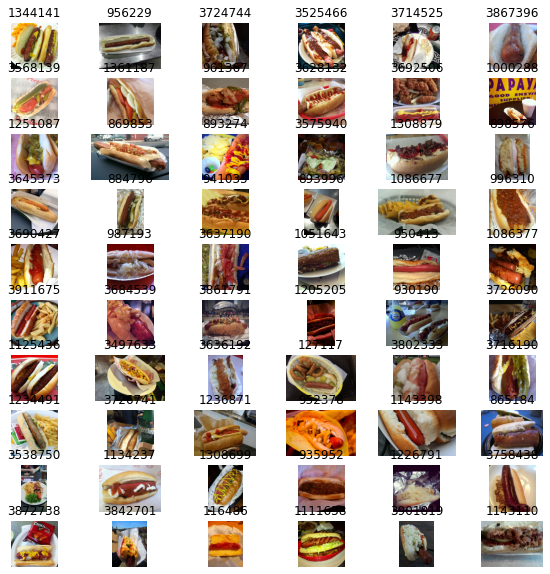

In [160]:
# Data Check
import PIL
%matplotlib inline

rows = 10
fig,axes = plt.subplots(nrows = 4, ncols = 249, figsize=(50,50))
for ax in axes.flatten():
    ax.axis('off')
    
os.chdir('../hot_dog/')
files = os.listdir('../hot_dog/')


for num, x in enumerate(files):
    img = PIL.Image.open(x)
    plt.subplot(rows,6,num+1)
    plt.title(x.split('.')[0])
    plt.axis('off')
    plt.imshow(img)    

ValueError: num must be 1 <= num <= 120, not 121

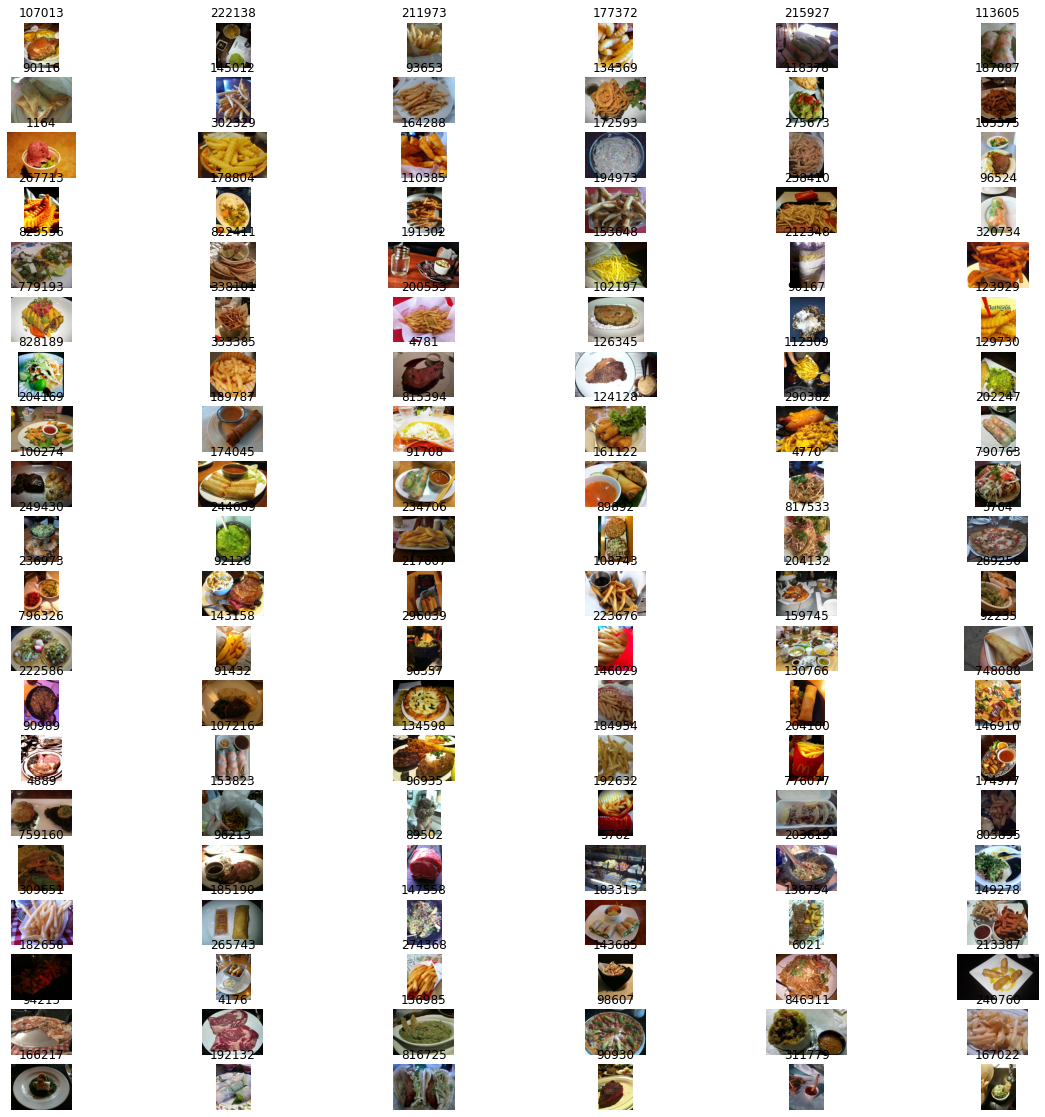

In [161]:
# Data Check

# Data Check
import PIL
%matplotlib inline

rows = 20
fig,axes = plt.subplots(nrows = 4, ncols = 249, figsize=(50,50))
for ax in axes.flatten():
    ax.axis('off')
    
os.chdir('../not_hot_dog/')
files = os.listdir('../not_hot_dog/')

for num, x in enumerate(files):
    img = PIL.Image.open(x)
    plt.subplot(rows,6,num+1)
    plt.title(x.split('.')[0])
    plt.axis('off')
    plt.imshow(img)    
rows = 5

In [ ]:
# for i in img_paths:
    print(i)

In [45]:
from IPython.display import Image, display
import numpy as np

from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.python.keras.applications import imagenet_utils
from keras.applications.vgg16 import preprocess_input, decode_predictions
image_size = 224

def read_and_prep_images(img_paths, img_height=image_size, img_width=image_size):
    imgs = [load_img(img_path, target_size=(img_height, img_width)) for img_path in img_paths]
    img_array = np.array([img_to_array(img) for img in imgs])
    output = preprocess_input(img_array)
    return(output)


my_model = ResNet50(weights='../is_that_a_hot_dog/assets/ResNet-50/resnet50_weights_tf_dim_ordering_tf_kernels.h5')
test_data = read_and_prep_images(img_paths)
preds = my_model.predict(test_data)

most_likely_labels = decode_predictions(preds, top=3)

40960/35363 [==================================] - 0s 2us/step


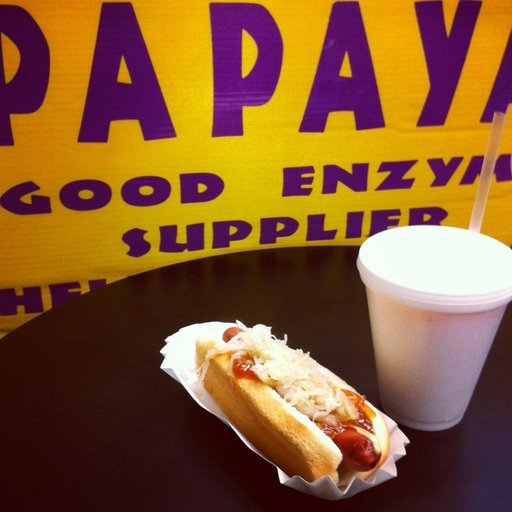

[('n07697537', 'hotdog', 0.91829276), ('n01981276', 'king_crab', 0.045035973), ('n07697313', 'cheeseburger', 0.004930661)]


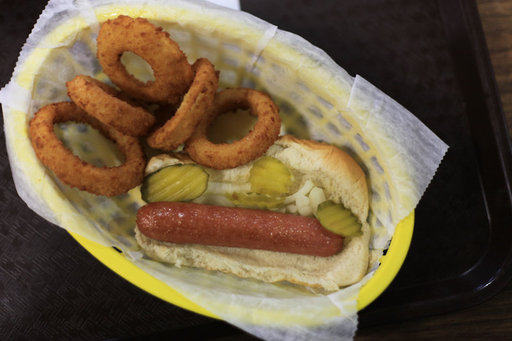

[('n07697537', 'hotdog', 0.973242), ('n07697313', 'cheeseburger', 0.023891263), ('n02776631', 'bakery', 0.00057564734)]


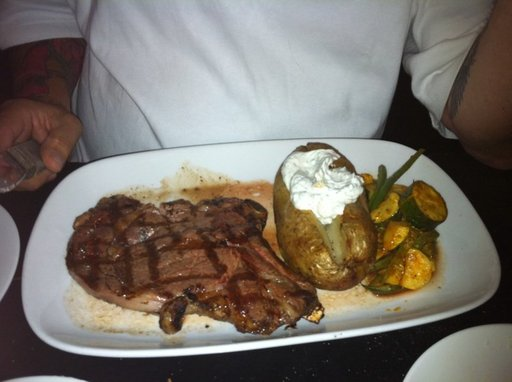

[('n07579787', 'plate', 0.6673937), ('n07614500', 'ice_cream', 0.09440665), ('n07836838', 'chocolate_sauce', 0.056440838)]


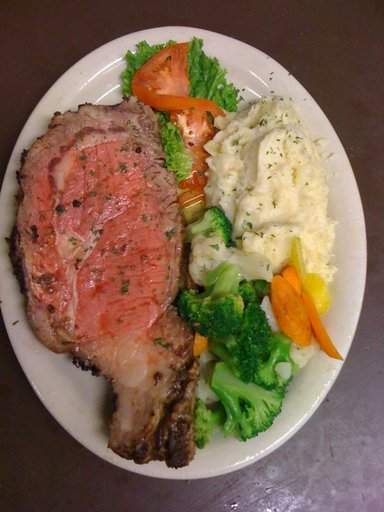

[('n07871810', 'meat_loaf', 0.88063985), ('n07711569', 'mashed_potato', 0.06951837), ('n07579787', 'plate', 0.021463)]


In [47]:
# Data Visuals
for i, img_path in enumerate(img_paths):
    display(Image(img_path))
    print(most_likely_labels[i])

In [50]:
decoded = decode_predictions(preds, top=1)
print("Above Images descriptions!")
for i in decoded:
    print(i)

Above Images descriptions!
[('n07697537', 'hotdog', 0.91829276)]
[('n07697537', 'hotdog', 0.973242)]
[('n07579787', 'plate', 0.6673937)]
[('n07871810', 'meat_loaf', 0.88063985)]


In [51]:
def is_hot_dog(preds):
    decoded = decode_predictions(preds, top=1)

    # pull out predicted label, which is in d[0][1] due to how decode_predictions structures results
    labels = [d[0][1] for d in decoded]
    out = [l == 'hotdog' for l in labels]
    return out

In [52]:
def calc_accuracy(model, paths_to_hotdog_images, paths_to_other_images):
    # We'll use the counts for denominator of accuracy calculation
    num_hot_dog_images = len(paths_to_hotdog_images)
    num_other_images = len(paths_to_other_images)

    hotdog_image_data = read_and_prep_images(paths_to_hotdog_images)
    preds_for_hotdogs = model.predict(hotdog_image_data)
    # Summing list of binary variables gives a count of True values
    num_correct_hotdog_preds = sum(is_hot_dog(preds_for_hotdogs))

    other_image_data = read_and_prep_images(paths_to_other_images)
    preds_other_images = model.predict(other_image_data)
    # Number correct is the number judged not to be hot dogs
    num_correct_other_preds = num_other_images - sum(is_hot_dog(preds_other_images))

    total_correct = num_correct_hotdog_preds + num_correct_other_preds
    total_preds = num_hot_dog_images + num_other_images
    return total_correct / total_preds
my_model_accuracy = calc_accuracy(my_model, hot_dog_paths, not_hot_dog_paths)
print("Fraction correct in small test set: {}".format(my_model_accuracy))

Fraction correct in small test set: 1.0


In [56]:
from tensorflow.keras.applications import VGG16
vgg16_model = VGG16(weights='../is_that_a_hot_dog/assets/VGG-16/vgg16_weights_tf_dim_ordering_tf_kernels.h5')
vgg16_accuracy = calc_accuracy(vgg16_model, hot_dog_paths, not_hot_dog_paths)

In [57]:
print("Fraction correct in small dataset: {}".format(vgg16_accuracy))

Fraction correct in small dataset: 1.0


***